In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_excel('clust4.xlsx')
df.head()

,Артикул,ПМЕД,ОМЕД,ПСР,ОСР,КЛИЕНТЫ,ДОЛЯ,ПМАКС,ОМАКС,ДИНАМИКА
0,111749,0.00,0.00,244544.000000,2.850127e+05,9,0.523063,2929920.0,3033080.00,2.000000
1,107440,164565.00,493855.36,223572.883333,4.780704e+05,35,0.455484,494088.0,961360.00,1.433085
2,106386,215140.53,939385.44,213623.017500,1.223020e+06,106,0.204334,381546.0,2880455.82,0.869263
3,115419,126855.00,413230.00,186500.916667,4.355873e+05,25,0.237145,492346.5,1270150.00,0.989492
4,106395,102459.00,176988.39,185610.101667,2.850417e+05,56,0.266598,578016.0,1035765.78,1.284696


Разведывательный анализ

In [317]:
features = list(df.drop(['Артикул', 'КЛИЕНТЫ','ДОЛЯ','ДИНАМИКА'], axis=1).columns)
for feature in features:
    df[feature] = df[feature].apply(lambda x: np.log(x+1))

In [318]:

#sns.pairplot(df.drop(['Артикул'], axis=1))

<AxesSubplot: >

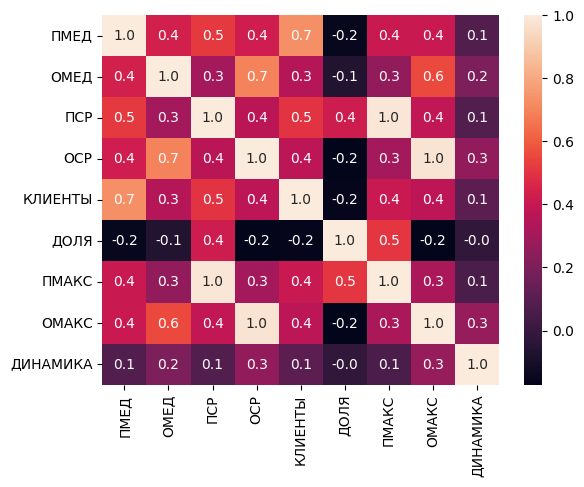

In [319]:

sns.heatmap(df.drop('Артикул', axis=1).corr(), annot=True, fmt='.1f')

In [320]:
df = df.drop(['ОМАКС','ПМАКС'], axis=1)

Кластеризация

In [321]:

df_clust = df.drop(['Артикул'], axis=1)

columns = list(df_clust.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clust = scaler.fit_transform(df_clust)


c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<AxesSubplot: xlabel='K', ylabel='Silouhette'>

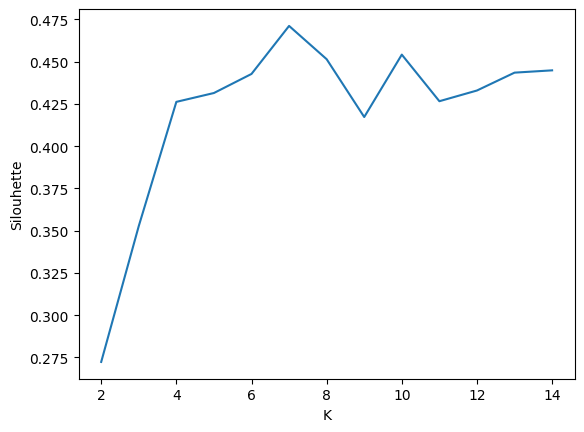

In [322]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list = list()
for i in range(2,15):
    kmeans = KMeans(random_state=42, n_clusters=i)
    kmeans.fit(df_clust)
    sil_list.append([i, silhouette_score(df_clust,kmeans.labels_)])

sil_df = pd.DataFrame(sil_list, columns=['K','Silouhette'])
sns.lineplot(sil_df, x='K', y='Silouhette')

In [323]:
kmeans = KMeans(random_state=42, n_clusters=7)
kmeans.fit(df_clust)




df['cluster'] = kmeans.labels_

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [324]:

Centers = pd.DataFrame(list(kmeans.cluster_centers_), columns= columns )
Centers

,ПМЕД,ОМЕД,ПСР,ОСР,КЛИЕНТЫ,ДОЛЯ,ДИНАМИКА
0,3.863508e-03,6.862081e-01,0.601012,0.699453,2.995054e-02,6.852437e-01,0.909016
1,-8.326673e-17,-3.330669e-16,0.120960,0.518690,4.163336e-17,-2.220446e-16,0.387500
2,-5.551115e-17,-3.330669e-16,0.592760,0.361894,1.757307e-02,8.841606e-01,0.044452
3,7.324826e-01,7.822534e-01,0.800873,0.798506,1.574177e-01,4.352611e-01,0.575340
4,1.056377e-02,7.006653e-01,0.593616,0.713150,2.713880e-02,7.444639e-01,0.142698
5,-2.775558e-17,6.731250e-01,0.058148,0.677752,5.551115e-17,-2.220446e-16,0.479589
6,-5.551115e-17,0.000000e+00,0.637894,0.611952,2.678028e-02,7.578398e-01,0.989250


In [325]:
df['cluster'].value_counts()/df['cluster'].value_counts().sum()*100

0    22.991071
3    22.767857
4    16.294643
2    11.383929
5    10.714286
1     8.928571
6     6.919643
Name: cluster, dtype: float64

<AxesSubplot: >

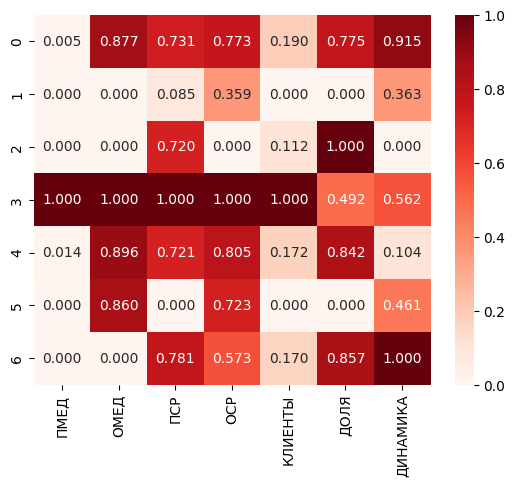

In [326]:
Centers = scaler.fit_transform(Centers)
Centers = pd.DataFrame(Centers,columns = list(df.drop(['Артикул', 'cluster'], axis=1).columns))

sns.heatmap(Centers, annot=True, fmt='.3f', cmap='Reds')

In [327]:
df.to_excel('clust.xlsx')

In [328]:
#sns.pairplot(df.drop(['Артикул'], axis=1), hue='cluster',corner=True, palette= 'colorblind')

In [329]:
from sklearn.cluster import AgglomerativeClustering

params = list()
for i in range(3,10):
    agc = AgglomerativeClustering(n_clusters=i)
    clusters = agc.fit_predict(df_clust)
    params.append([i,silhouette_score(df_clust,clusters)])
    
params = pd.DataFrame(params, columns=['K','silhouette'])
params.sort_values('silhouette', ascending=False)

,K,silhouette
4,7,0.453431
5,8,0.431985
3,6,0.429672
6,9,0.425988
2,5,0.420229
1,4,0.410928
0,3,0.325440


In [330]:
agc = AgglomerativeClustering(n_clusters=7)
agc.fit(df_clust)
pd.Series(agc.labels_).value_counts().sort_values(ascending=False)/pd.Series(agc.labels_).value_counts().sum()*100

0    27.008929
2    22.991071
1    14.732143
4    11.160714
3     8.928571
6     8.035714
5     7.142857
dtype: float64

In [331]:
df['cluster'] = kmeans.labels_

<AxesSubplot: >

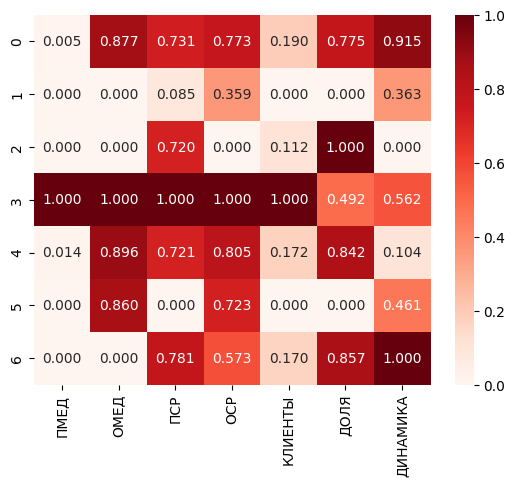

In [332]:
res = df.drop('Артикул', axis=1).groupby('cluster').mean()

res = scaler.fit_transform(res)


res = pd.DataFrame(res, columns=list(df.drop(['Артикул', 'cluster'], axis=1).columns))
sns.heatmap(res, annot=True, fmt='.3f', cmap='Reds')


<AxesSubplot: >

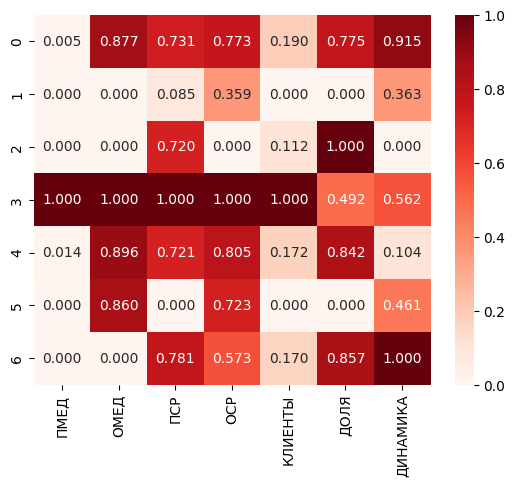

In [333]:
sns.heatmap(Centers, annot=True, fmt='.3f', cmap='Reds')